<a href="https://colab.research.google.com/github/parthkohli92/Tensorflow/blob/main/neural_networks_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf 
print(tf.__version__)

2.6.0



```

# Creating data to view and fit 

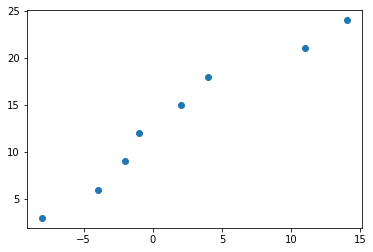

In [2]:
# Since we're working on regression problem (predicting a number) let's create some linear data( a straight line) to model.

import numpy as np
import matplotlib.pyplot as plt

# Create features 
X = np.array([-8.0,-4.0,-2.0,-1.0,2.0,4.0,11.0,14.0])

# Create Labels 
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it 
plt.scatter(X,Y)

In [3]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([900000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([900000], dtype=int32)>)

In [4]:
house_info.shape

TensorShape([3])

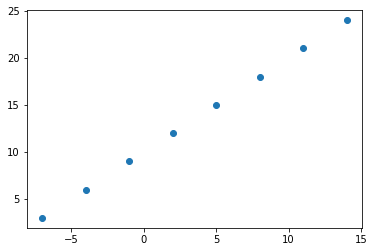

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [6]:
input_shape = X[0].shape

output_shape = y[0].shape

input_shape, output_shape


(TensorShape([]), TensorShape([]))

In [7]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

## Creating A Model

In [8]:
# Set Random Seed
tf.random.set_seed(42)

# Creating the model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10)
])

# Compiling the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 690ms/step - loss: 13.6989 - mae: 13.6989
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6842 - mae: 13.6842
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.6694 - mae: 13.6694
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 13.6547 - mae: 13.6547
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6400 - mae: 13.6400
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 13.6252 - mae: 13.6252
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 13.6105 - mae: 13.6105
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.5957 - mae: 13.5957
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5810 - mae: 13.5810
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5663 - mae: 13.5663
Epoch 11/100
1/1 [==============================] - 0s 9m

In [9]:
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
# Make a prediction with the model 
model.predict([17.0])

array([[10.182273 ,  4.568641 ,  2.355782 ,  5.158136 , -4.1555963,
        10.687251 , 12.079502 , 15.402303 , -0.8221183, -0.9007014]],
      dtype=float32)

## Visualizing

In [11]:
X = np.arange(-100,100,4)

In [12]:
y = np.arange(-90,110,4)

In [13]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

#### Split data into training and testing set 

In [14]:
 len(X)

50

In [15]:
# Split 
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

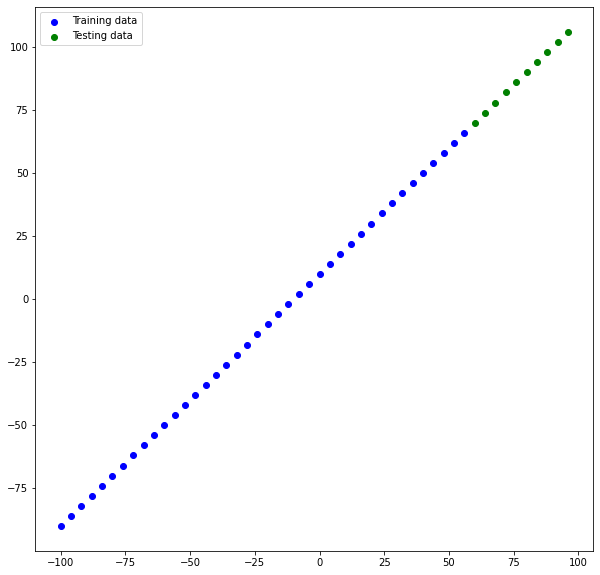

In [16]:
plt.figure(figsize=(10,10))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


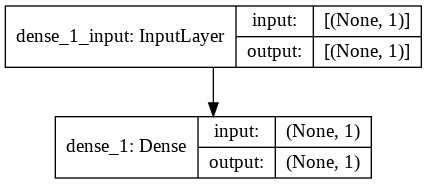

In [21]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

## Visualizing the predictions

In [22]:
# Make predictions
y_preds = model.predict(X_test)
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [23]:
# Buiding a plot function for ground truth tables and list of numbers we just got

def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  plt.figure(figsize=(8,4))
  plt.scatter(train_data, train_labels, c='b', label="Training Data")
  plt.scatter(test_data, test_labels, c='g', label="Testing Data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend();

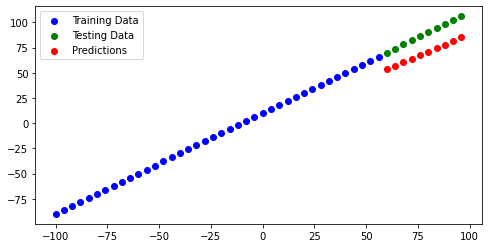

In [24]:
plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds)

## Evaluating Predictions

* MAE (mean absolute error)
* MSE (mean squared error)

In [25]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 135ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [26]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

MAE should be single output, instead we got 10 values and this is because our y_pred and y_test tensors are different

In [27]:
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [28]:
y_preds

array([[53.57109 ],
       [57.05633 ],
       [60.541573],
       [64.02681 ],
       [67.512054],
       [70.99729 ],
       [74.48254 ],
       [77.96777 ],
       [81.45301 ],
       [84.938255]], dtype=float32)

In [29]:
# Checking the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

In [30]:
# Using the squeeze() function for y_preds
y_preds.squeeze().shape

(10,)

In [31]:
y_test,y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [33]:
# Calculate the mae 
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [34]:
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                     y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=353.57336>

In [39]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

## Running experiments to improve a model
1. Get more Data
2. Make your model larger(use more complex model)
3. Train for longer


Since we've created our dataset, we could easily make more data but this isnt always the case when youre working with real world datasets

So lets take a look at how can i improve our model using 2 and 3 

To do so, we'lll create 3 models and compare their results

1. model_1 - same as og model,1 layer, trained for 100 epochs 
2. model_2 - 2 layers, trained for 100 epochs
3. model_3 - 2 layers trained for 500 epochs

## ** Building model_1 **

In [36]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_1.fit(X_train,y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 13ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

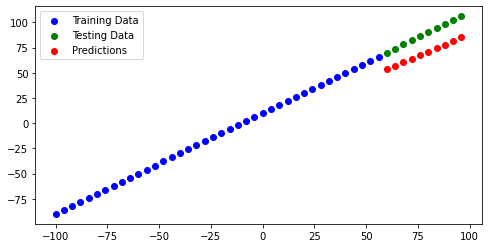

In [38]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [40]:
# Calculate model_1 metrics 
mae_1= mae(y_test, y_preds_1.squeeze()).numpy()
mse_1= mse(y_test, y_preds_1.squeeze()).numpy()

mae_1, mse_1

(18.745327, 353.57336)

**Building model_2**

In [42]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(X_train,y_train,epochs=100, verbose=0)

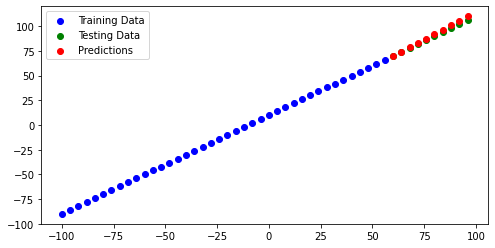

In [43]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [44]:
mae_2= mae(y_test, y_preds_2.squeeze()).numpy()
mse_2= mse(y_test, y_preds_2.squeeze()).numpy()

mae_2, mse_2

(1.9098114, 5.459232)

**Building model_3**

In [46]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(X_train,y_train,epochs=500,verbose=0)

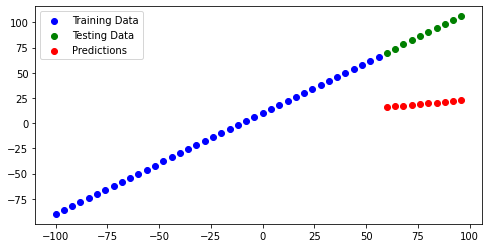

In [47]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [48]:
mae_3= mae(y_test, y_preds_3.squeeze()).numpy()
mse_3= mse(y_test, y_preds_3.squeeze()).numpy()

mae_3, mse_3

(68.68786, 4804.4717)

## Comparing results of all the models now

In [49]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mse_3]]

In [52]:
import pandas as pd

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,4804.471680


From our experiments, it looks like model_2 performed the best.

# Saving my model 

In [53]:
# Saving model 2 as it perfomed the best 

model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets
